# DATA LOADING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [ ]:
df = pd.read_csv("output.csv")
df

,complaint_id,subject,date_received,date_sent_to_company,complaint,Topic
0,3229299,write notification about debt,2019-05-01T12:00:00-05:00,2019-05-01T12:00:00-05:00,good morning my name be and I appreciate it ...,Payment and Billing
1,3199379,other feature term or problem,2019-04-02T12:00:00-05:00,2019-04-02T12:00:00-05:00,I upgrade my card in 2018 and be tell by the...,Dispute reporting
2,3233499,incorrect information on your report,2019-05-06T12:00:00-05:00,2019-05-06T12:00:00-05:00,chase card be report on 2019 however fraudulen...,Credit card Management
3,3180294,incorrect information on your report,2019-03-14T12:00:00-05:00,2019-03-15T12:00:00-05:00,on 2018 while try to book a ticket I com...,Credit card Management
4,3224980,manage an account,2019-04-27T12:00:00-05:00,2019-04-27T12:00:00-05:00,my grand son give I check for 160000 I deposit...,Retail Banking Operations
...,...,...,...,...,...,...
21067,3094545,advertising and marketing include promotional ...,2018-12-07T12:00:00-05:00,2018-12-07T12:00:00-05:00,after be a chase card customer for well over a...,Dispute reporting
21068,3091984,other feature term or problem,2018-12-05T12:00:00-05:00,2018-12-05T12:00:00-05:00,on wednesday I call chas my visa credit car...,Dispute reporting
21069,3133355,problem with a lender or other company charge ...,2019-01-25T12:00:00-05:00,2019-01-25T12:00:00-05:00,I be not familiar with pay and do not underst...,Dispute reporting
21070,3110963,other feature term or problem,2018-12-27T12:00:00-05:00,2018-12-27T12:00:00-05:00,I have have flawless credit for 30 yrs I ve ha...,Mortgages/loans


In [ ]:
df.shape

(21072, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21072 entries, 0 to 21071
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   complaint_id          21072 non-null  int64 
 1   subject               21072 non-null  object
 2   date_received         21072 non-null  object
 3   date_sent_to_company  21072 non-null  object
 4   complaint             21072 non-null  object
 5   Topic                 21072 non-null  object
dtypes: int64(1), object(5)
memory usage: 987.9+ KB


# TOPIC MODELLING + PREPROCESSING

In [ ]:
urgency_corpus = [
    "emergency", "urgent", "critical", "immediate", "priority",
    "crisis", "important", "vital", "essential", "pressing",
    "acute", "crucial", "time-sensitive", "demanding", "hurry",
    "rush", "swift", "fast", "quick", "rapid",
    "dire", "life-threatening", "desperate", "exigent", "serious",
    "imminent", "overdue", "alarm", "pertinent", "imperative",
    "red alert", "require immediate attention", "escalated",
    "urgent action required", "attention needed", "ASAP", "time is of the essence",
    "critical situation", "urgent matter", "time crunch", "pressing issue",
    "time-bound", "high-priority", "top priority", "hot issue",
    "need urgent assistance", "action required", "urgent request",
    "expedite", "imperious", "instant", "imperativeness",
    "immediacy", "precipitate", "quicken", "impending", "prompt",
    "instantaneous", "expeditious", "momentous", "dire need",
    "imperious demand", "critical juncture", "instant action",
    "time-sensitive matter", "instantaneous response", "pressing matter",
    "urgent situation", "time-sensitive issue", "critical deadline",
    "urgent demand", "crucial moment", "time-bound task", "urgent requirement",
    "critical condition", "time-critical situation", "urgent appeal",
    "dire situation", "time-sensitive task", "critical issue",
    "emergency situation", "time-sensitive deadline", "pressing deadline",
    "critical demand", "emergency response", "urgent action needed",
    "critical action", "urgent need", "time-sensitive situation",
    "critical task", "urgent problem", "time-critical deadline",
    "urgent circumstance", "critical matter", "urgent issue",
    "time-sensitive request", "critical request", "urgent task",
    "time-critical task", "urgent event", "time-sensitive action",
    "critical emergency", "urgent attention", "time-sensitive emergency",
    "critical challenge", "urgent challenge", "time-sensitive challenge",
    "critical incident", "urgent incident", "time-sensitive incident",
    "critical problem", "urgent problem", "time-sensitive problem",
    "critical decision", "urgent decision", "time-sensitive decision",
    "critical phase", "urgent phase", "time-sensitive phase",
    "critical circumstance", "urgent circumstance", "time-sensitive circumstance",
    "urgent email", "priority email", "high-priority email",
    "time-sensitive email", "urgent message", "priority message",
    "high-priority message", "time-sensitive message",
    "urgent correspondence", "priority correspondence",
    "high-priority correspondence", "time-sensitive correspondence",
    "urgent communication", "priority communication",
    "high-priority communication", "time-sensitive communication"
]
print(len(urgency_corpus))

138


In [ ]:
df.head()

,complaint_id,subject,date_received,date_sent_to_company,complaint,Topic
0,3229299,write notification about debt,2019-05-01T12:00:00-05:00,2019-05-01T12:00:00-05:00,good morning my name be and I appreciate it ...,Payment and Billing
1,3199379,other feature term or problem,2019-04-02T12:00:00-05:00,2019-04-02T12:00:00-05:00,I upgrade my card in 2018 and be tell by the...,Dispute reporting
2,3233499,incorrect information on your report,2019-05-06T12:00:00-05:00,2019-05-06T12:00:00-05:00,chase card be report on 2019 however fraudulen...,Credit card Management
3,3180294,incorrect information on your report,2019-03-14T12:00:00-05:00,2019-03-15T12:00:00-05:00,on 2018 while try to book a ticket I com...,Credit card Management
4,3224980,manage an account,2019-04-27T12:00:00-05:00,2019-04-27T12:00:00-05:00,my grand son give I check for 160000 I deposit...,Retail Banking Operations


In [ ]:
df.shape

(21072, 6)

In [ ]:
df['complaint'].dropna(inplace=True)
df['subject'].dropna(inplace=True)

In [ ]:
df.shape

(21072, 6)

In [ ]:
def is_urgent(word):
    return word in urgency_corpus

def check_urgency(tokens):
    return any(is_urgent(token) for token in tokens)


complaint_tokens = df['complaint'].str.split() #tokenization
subject_tokens = df['subject'].str.split()

df['complaint_urgent'] = complaint_tokens.apply(check_urgency)
df['subject_urgent'] = subject_tokens.apply(check_urgency)

df['urgent'] = df['complaint_urgent'] | df['subject_urgent']


## code to handle negation

In [ ]:
! pip install spacy
! pip install negspacy
! pip install spacy_stanza
import spacy
import stanza
import spacy_stanza
from negspacy.negation import Negex
from negspacy.termsets import termset

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for negspacy: filename=negspacy-1.0.4-py3-none-any.whl size=12535 sha256=7e80759da008754d6101699869df4cd5472f8417ab6b93c697e2fef10d44a4c9
  Stored in directory: /root/.cache/pip/wheels/15/31/f0/3a217aaedf320e4df653347cd6538f3648263b864c8e140853
Successfully built negspacy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 7.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidi

In [ ]:
nlp_model = spacy_stanza.load_pipeline('en')
nlp_model.add_pipe("negex", config={"ent_types":["PERSON","ORG","CARDINAL", "DATE", "EVENT", "LANGUAGE", "PRODUCT", "QUANTITY", "TIME", "WORK_OF_ART"]})

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| pos          | combined_charlm     |
| lemma        | combined_nocharlm   |
| constituency | ptb3-revised_charlm |
| depparse     | combined_charlm     |
| sentiment    | sstplus             |
| ner          | ontonotes_charlm    |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [ ]:
sample = nlp_model('There is no English language option.')

for e in sample.ents:
  print(e.text, e._.negex)

English True


In [ ]:
doc = nlp_model('He does not like Adolf Hitler but likes German products.')

for e in doc.ents:
  print(e.text, e._.negex)

Adolf Hitler True
German False


In [ ]:
label_map = {"urgent": 1, "not urgent": 0}

negation_model = nlp_model.get_pipe("negex")  # Get the negation terms detection component

def assign_label(text):
    doc = nlp_model(text)
    is_negated = any(ent._.negex for ent in doc.ents)  # Check if any entities are negated

    # Check for urgency keywords and handle negation
    is_urgent = any(token.text.lower() in urgency_corpus for token in doc)
    if is_urgent and is_negated:
        return label_map["not urgent"]
    elif is_urgent:
        return label_map["urgent"]
    else:
        return label_map["not urgent"]

df['text_column'] = df['complaint'] + ' ' + df['subject']
df['urgent'] = df['text_column'].apply(assign_label)

In [ ]:
df['priority'] = df['urgent'].map({True: 'urgent', False: 'not urgent'})

df.drop(['complaint_urgent', 'subject_urgent' , 'urgent'], axis=1, inplace=True)

df.head()

,complaint_id,subject,date_received,date_sent_to_company,complaint,Topic,priority
0,3229299,write notification about debt,2019-05-01T12:00:00-05:00,2019-05-01T12:00:00-05:00,good morning my name be and I appreciate it ...,Payment and Billing,not urgent
1,3199379,other feature term or problem,2019-04-02T12:00:00-05:00,2019-04-02T12:00:00-05:00,I upgrade my card in 2018 and be tell by the...,Dispute reporting,not urgent
2,3233499,incorrect information on your report,2019-05-06T12:00:00-05:00,2019-05-06T12:00:00-05:00,chase card be report on 2019 however fraudulen...,Credit card Management,not urgent
3,3180294,incorrect information on your report,2019-03-14T12:00:00-05:00,2019-03-15T12:00:00-05:00,on 2018 while try to book a ticket I com...,Credit card Management,not urgent
4,3224980,manage an account,2019-04-27T12:00:00-05:00,2019-04-27T12:00:00-05:00,my grand son give I check for 160000 I deposit...,Retail Banking Operations,not urgent


In [ ]:
df.shape

(21072, 7)

In [ ]:
print(df['priority'].unique())

['not urgent' 'urgent']


In [ ]:
df['priority'].value_counts()

priority
not urgent    18908
urgent         2164
Name: count, dtype: int64

In [ ]:
urgent_complaints = df[df['priority'] == 'urgent']['complaint']
print(urgent_complaints.iloc[6])

in  of this year chase withdraw money from my escrow account to pay my property taxis however they also withdraw money to pay for another property that I do not own or have any connection with I or my account 

 this leave I in an escrow shortage and they have adjust my monthly payment to reflect this as well I call to explain their mistake and they take two week but finally manage to remove the incorrect parcel from my account 

 however they be not refund the erroneous tax payment they make from my escrow account and be instead   wait   for the local municipality to refund the money 

 from my perspective chase without my immediate knowledge or permission have misappropriate fund from my escrow account and now I be stick foot the bill until they get the money back


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21072 entries, 0 to 21071
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   complaint_id          21072 non-null  int64 
 1   subject               21072 non-null  object
 2   date_received         21072 non-null  object
 3   date_sent_to_company  21072 non-null  object
 4   complaint             21072 non-null  object
 5   Topic                 21072 non-null  object
 6   priority              21072 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.1+ MB


In [ ]:
df.to_csv('output_with_priority.csv', index=False)

## Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

cv = CountVectorizer()
complaint_cnt = cv.fit_transform(df['complaint'])
subject_cnt = cv.fit_transform(df['subject'])

tfidf_transformer= TfidfTransformer()
complaint_tfidf = tfidf_transformer.fit_transform(complaint_cnt)
subject_tfidf = tfidf_transformer.fit_transform(subject_cnt)

In [ ]:
import scipy.sparse as sp

X_train_combined_tfidf = sp.hstack((complaint_tfidf, subject_tfidf), format='csr')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_train_combined_tfidf, df['priority'], test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15804, 29906)
(15804,)
(5268, 29906)
(5268,)


# MODEL TRAINING AND TESTING

1. Logistic regression



In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)
logreg.score(X_test, y_test)

0.9011009870918755

confusion_matrix: The cell at row i and column j represents the number of instances where the true label was class i, but the model predicted class j.

In [ ]:
y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

logreg_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", logreg_accuracy)

[[4708    2]
 [ 519   39]]
              precision    recall  f1-score   support

  not urgent       0.90      1.00      0.95      4710
      urgent       0.95      0.07      0.13       558

    accuracy                           0.90      5268
   macro avg       0.93      0.53      0.54      5268
weighted avg       0.91      0.90      0.86      5268

Accuracy: 0.9011009870918755


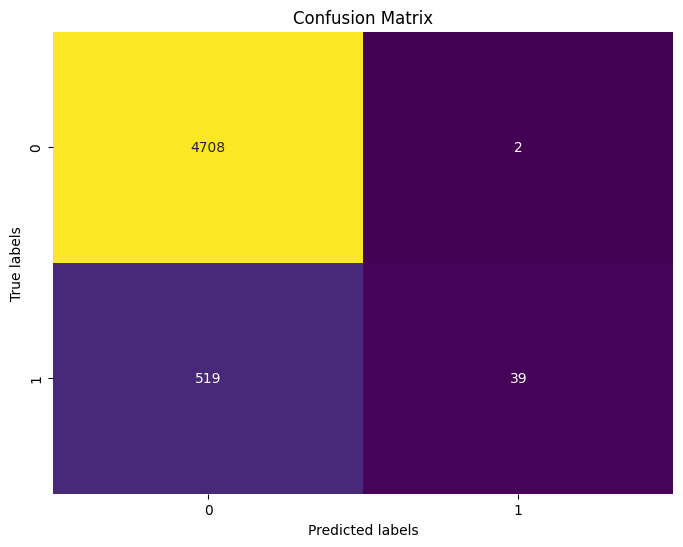

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix as a color image
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
dt.score(X_test, y_test)

0.9996203492786636

In [ ]:
y_pred = dt.predict(X_test)
cm= confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

dt_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", dt_accuracy)

[[4710    0]
 [   2  556]]
              precision    recall  f1-score   support

  not urgent       1.00      1.00      1.00      4710
      urgent       1.00      1.00      1.00       558

    accuracy                           1.00      5268
   macro avg       1.00      1.00      1.00      5268
weighted avg       1.00      1.00      1.00      5268

Accuracy: 0.9996203492786636


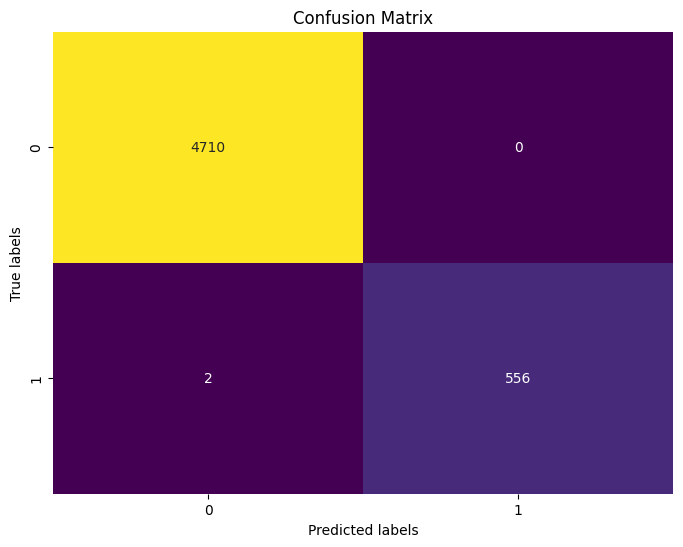

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix as a color image
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

3. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
rf.score(X_test, y_test)

0.9003416856492027

In [ ]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

[[4709    1]
 [ 524   34]]
              precision    recall  f1-score   support

  not urgent       0.90      1.00      0.95      4710
      urgent       0.97      0.06      0.11       558

    accuracy                           0.90      5268
   macro avg       0.94      0.53      0.53      5268
weighted avg       0.91      0.90      0.86      5268

Accuracy: 0.9003416856492027


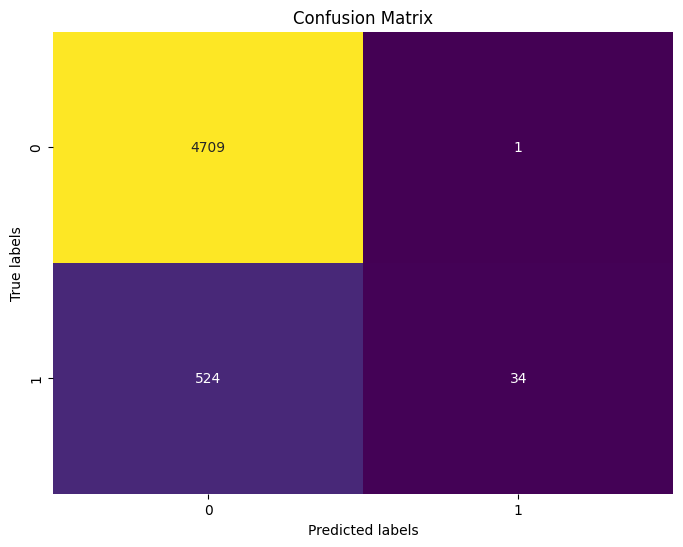

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix as a color image
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

4. SVM

In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC(random_state=42).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9468488990129081

In [ ]:
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_accuracy)

[[4709    1]
 [ 279  279]]
              precision    recall  f1-score   support

  not urgent       0.94      1.00      0.97      4710
      urgent       1.00      0.50      0.67       558

    accuracy                           0.95      5268
   macro avg       0.97      0.75      0.82      5268
weighted avg       0.95      0.95      0.94      5268

Accuracy: 0.9468488990129081


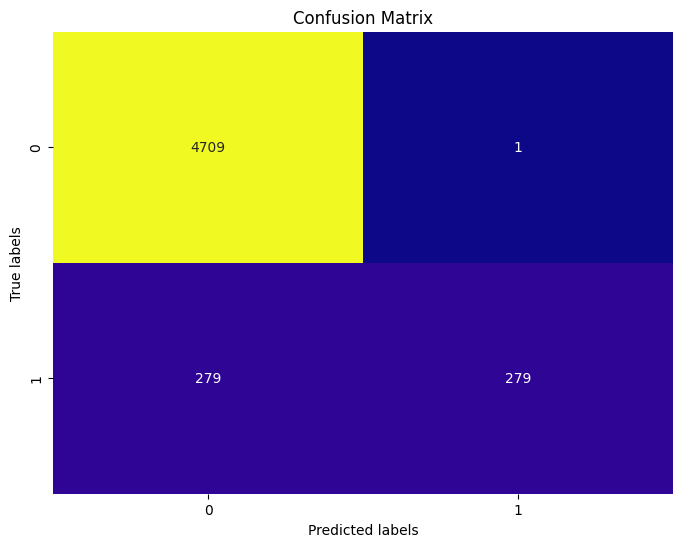

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix as a color image
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='plasma', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

5. Multinomial Naive Bayes


suitable for text classification tasks !

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB().fit(X_train, y_train)
nb.score(X_test, y_test)

0.8938876233864844

In [ ]:
y_pred = nb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

nb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", nb_accuracy)

[[4709    1]
 [ 558    0]]
              precision    recall  f1-score   support

  not urgent       0.89      1.00      0.94      4710
      urgent       0.00      0.00      0.00       558

    accuracy                           0.89      5268
   macro avg       0.45      0.50      0.47      5268
weighted avg       0.80      0.89      0.84      5268

Accuracy: 0.8938876233864844


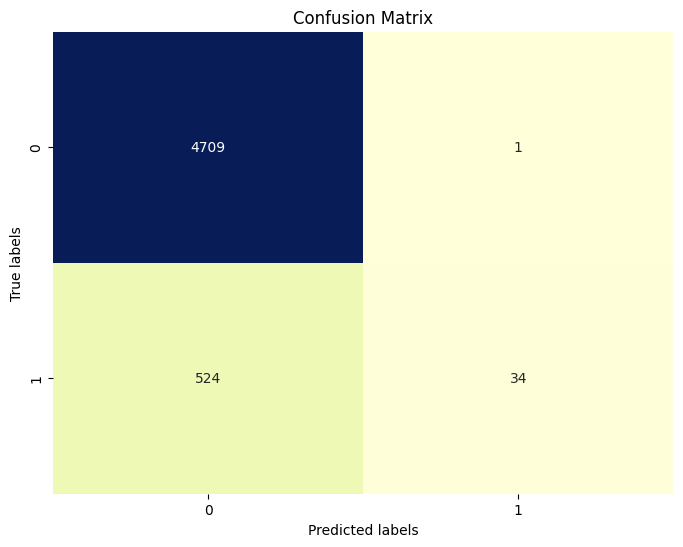

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix as a color image
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

6. Gradient Boosting Machines

powerful for text classification tasks.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
gb.score(X_test, y_test)

0.9884206529992406

In [ ]:
y_pred = gb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

gb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", gb_accuracy)

[[4710    0]
 [  61  497]]
              precision    recall  f1-score   support

  not urgent       0.99      1.00      0.99      4710
      urgent       1.00      0.89      0.94       558

    accuracy                           0.99      5268
   macro avg       0.99      0.95      0.97      5268
weighted avg       0.99      0.99      0.99      5268

Accuracy: 0.9884206529992406


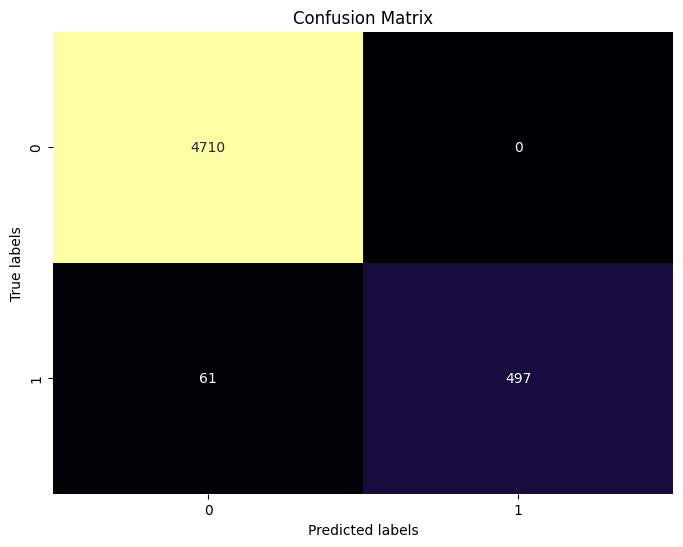

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix as a color image
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='inferno', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

7. XGBoost

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y_train)), random_state=42)
xg = xgb_model.fit(X_train, y_train_encoded)

In [ ]:
y_pred = xg.predict(X_test)
cm = confusion_matrix(y_test_encoded, y_pred)
print(cm)
print(classification_report(y_test_encoded, y_pred))

xg_accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", xg_accuracy)

[[4710    0]
 [  14  544]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4710
           1       1.00      0.97      0.99       558

    accuracy                           1.00      5268
   macro avg       1.00      0.99      0.99      5268
weighted avg       1.00      1.00      1.00      5268

Accuracy: 0.9973424449506454


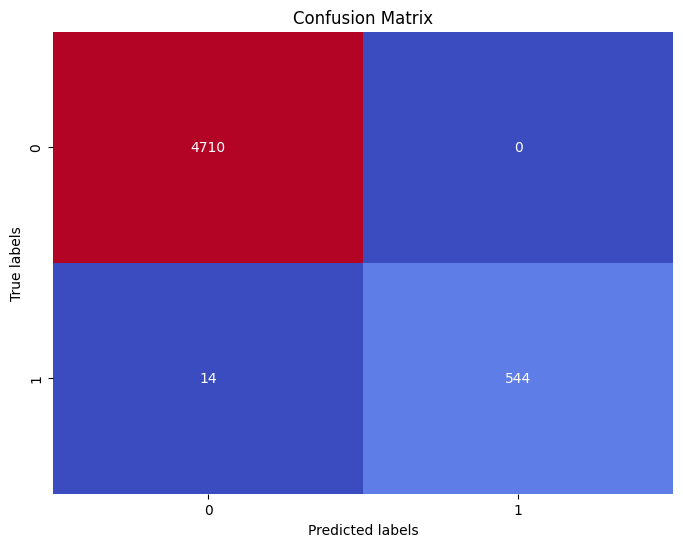

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix as a color image
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ACCURACY visualisation

In [ ]:
from tabulate import tabulate

accuracies = [
    ("Logistic Regression", logreg_accuracy),
    ("Decision Tree", dt_accuracy),
    ("Random Forest", rf_accuracy),
    ("SVM", svm_accuracy),
    ("Multinomial Naive Bayes",nb_accuracy),
    ("Gradient Boosting Machines",gb_accuracy),
    ("XGBoost",xg_accuracy)
]


print(tabulate(accuracies, headers=["Model", "Accuracy"], tablefmt="grid"))


+----------------------------+------------+
| Model                      |   Accuracy |
+============================+============+
| Logistic Regression        |   0.901101 |
+----------------------------+------------+
| Decision Tree              |   0.99962  |
+----------------------------+------------+
| Random Forest              |   0.900342 |
+----------------------------+------------+
| SVM                        |   0.946849 |
+----------------------------+------------+
| Multinomial Naive Bayes    |   0.893888 |
+----------------------------+------------+
| Gradient Boosting Machines |   0.988421 |
+----------------------------+------------+
| XGBoost                    |   0.997342 |
+----------------------------+------------+


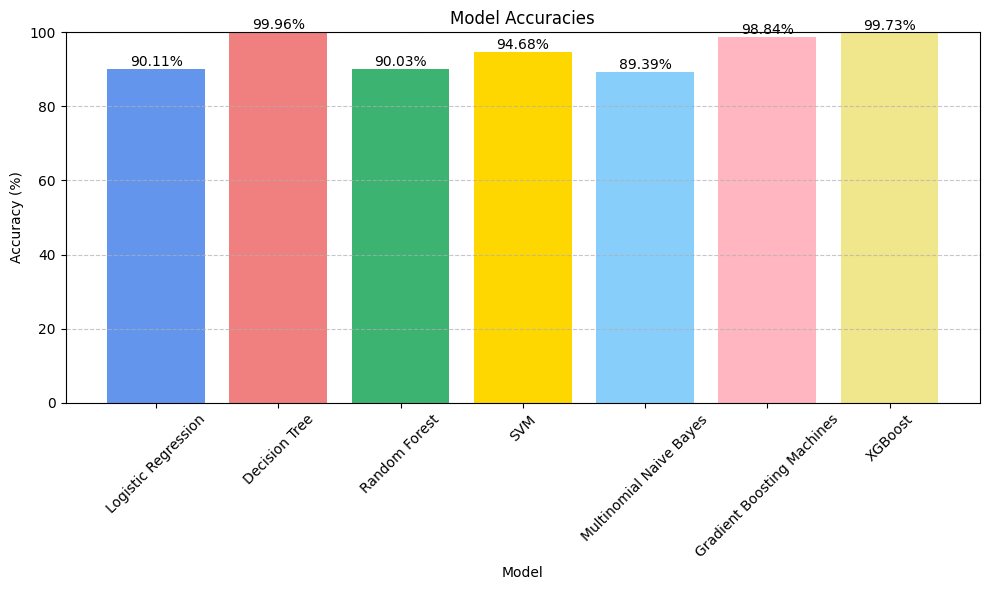

In [ ]:
import matplotlib.pyplot as plt

models = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "Multinomial Naive Bayes", "Gradient Boosting Machines","XGBoost"]

accuracies = [logreg_accuracy, dt_accuracy, rf_accuracy, svm_accuracy, nb_accuracy, gb_accuracy,xg_accuracy]

accuracies_percent = [accuracy * 100 for accuracy in accuracies]

colors = ['cornflowerblue', 'lightcoral', 'mediumseagreen', 'gold', 'lightskyblue', 'lightpink', 'khaki', 'blue']


plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies_percent, color=colors)
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar, accuracy in zip(bars, accuracies_percent):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()